In [6]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import warnings

In [19]:
"""
데이터 로드
"""
train = pd.read_csv("./dataset/train.csv")
test = pd.read_csv("./dataset/test.csv")
submit = pd.read_csv("./dataset/raw/sample_submission.csv")
test_label = pd.read_csv("./dataset/raw/test_label.csv")

with open("./dataset/candidates_pre.pkl", 'rb') as f:
            cand_pre = pickle.load(f)

with open("./dataset/candidates_test_pre.pkl", 'rb') as f:
            cand_pre_test = pickle.load(f)

In [14]:
print("*train NaN: \n", train[train.columns].isnull().sum())
print()
print("*test NaN: \n", test[test.columns].isnull().sum())

*train NaN: 
 precipitation    678
temp_mean          0
temp_highest       0
temp_lowest        0
PM10               0
PM2.5              0
humidity           0
sunshine_sum       0
sunshine_rate      0
wind_mean          0
wind_max           0
rental             0
year               0
month              0
day                0
dtype: int64

*test NaN: 
 precipitation    205
temp_mean          0
temp_highest       0
temp_lowest        0
PM10               0
PM2.5              0
humidity           0
sunshine_sum       0
sunshine_rate      0
wind_mean          0
wind_max           0
year               0
month              0
day                0
dtype: int64


In [18]:
# 벤치마크 함수
def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score

In [144]:
"""
Naive 데이터
"""
columns = train.columns.difference(['rental', 'dayofweek'])
# ['precipitation', 'temp_mean', 'temp_highest', 'temp_lowest', 'PM10', 'PM2.5', 
# 'humidity', 'sunshine_sum', 'sunshine_rate', 'wind_mean',
# 'wind_max', 'year', 'month', 'day', 'holiday']

# 강수량 결측
isnull = train['precipitation'].isnull()
isnull_test = test['precipitation'].isnull()

# Raw X, Y set: 학습 데이터, 라벨 분리 (강수량 결측치)
X = np.array(train[columns].values.tolist())
Y = np.array(train['rental'].values.tolist())
X_test = np.array(test[columns].values.tolist())
Y_test = np.array(test_label['rental'].values.tolist())

isnan = np.isnan(X)
isnan_test = np.isnan(X_test)

<AxesSubplot:>

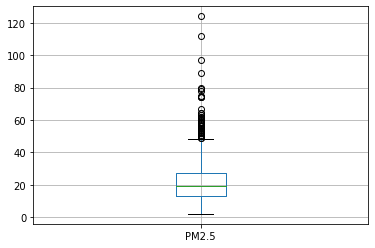

In [59]:
# outliers
fig, ax = plt.subplots()
train.boxplot(column='PM2.5')

# Random Forest
## Naive (all features)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [41]:
# 강수량
for i in ['poly', 'exp', 'mean']:
    X[isnan] = cand_pre[i]   # 결측치
    X_test[isnan_test] = cand_pre_test[i]
    
    reg = RandomForestRegressor()
    reg.fit(X, Y)
    pred = reg.predict(X)
    pred_test = reg.predict(X_test)
    
    score = NMAE(Y, pred)
    score_test = NMAE(Y_test, pred_test)
    print("====[", i, "]====")
    print("Train score: ", score)
    print("Test score: ", score_test)
    print()

====[ poly ]====
Train score:  0.07788365740853963
Test score:  0.350953823606859

====[ exp ]====
Train score:  0.07638887974772736
Test score:  0.3363775408453516

====[ mean ]====
Train score:  0.07844363081617267
Test score:  0.3419955417791246



In [ ]:
columns = train.columns.difference[['']]


# GBR
## Naive (all features)

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
# 강수량
for i in ['poly', 'exp', 'mean']:
    X[isnan] = cand_pre[i]   # 결측치
    X_test[isnan_test] = cand_pre_test[i]
    
    reg = GradientBoostingRegressor()
    reg.fit(X, Y)
    pred = reg.predict(X)
    pred_test = reg.predict(X_test)
    
    score = NMAE(Y, pred)
    score_test = NMAE(Y_test, pred_test)
    print("====[", i, "]====")
    print("Train score: ", score)
    print("Test score: ", score_test)
    print()

====[ poly ]====
Train score:  0.13430575868158018
Test score:  0.3438537614773148

====[ exp ]====
Train score:  0.12759336902897508
Test score:  0.3185081682960035

====[ mean ]====
Train score:  0.13870417707713692
Test score:  0.3044796885349188



AttributeError: 'XGBRegressor' object has no attribute 'feature_importance'

# XGBoost
## Naive (all features)

In [234]:
from xgboost import XGBRegressor

In [47]:
# 강수량
for i in ['poly', 'exp', 'mean']:
    X[isnan] = cand_pre[i]   # 결측치
    X_test[isnan_test] = cand_pre_test[i]
    
    reg = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
    reg.fit(X, Y)
    pred = reg.predict(X)
    pred_test = reg.predict(X_test)
    
    score = NMAE(Y, pred)
    score_test = NMAE(Y_test, pred_test)
    print("====[", i, "]====")
    print("Train score: ", score)
    print("Test score: ", score_test)
    print()

====[ poly ]====
Train score:  0.030906091123068493
Test score:  0.33904842858565154

====[ exp ]====
Train score:  0.028299904086053866
Test score:  0.3310486358989212

====[ mean ]====
Train score:  0.030212210379118948
Test score:  0.3357736627409557



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

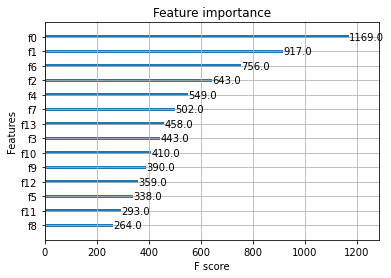

In [49]:
xgboost.plot_importance(reg)

## Feature importance 상위 6개

In [69]:
columns = [train.columns[0], train.columns[1], train.columns[6], train.columns[2], train.columns[4], train.columns[7]]
x = np.array(train[columns].values.tolist())
x_test = np.array(test[columns].values.tolist())

nan = np.isnan(x)
nan_test = np.isnan(x_test)

In [70]:
# 강수량
for i in ['poly', 'exp', 'mean']:
    x[nan] = cand_pre[i]   # 결측치
    x_test[nan_test] = cand_pre_test[i]
    
    reg = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
    reg.fit(x, Y)
    pred = reg.predict(x)
    pred_test = reg.predict(x_test)
    
    score = NMAE(Y, pred)
    score_test = NMAE(Y_test, pred_test)
    print("====[", i, "]====")
    print("Train score: ", score)
    print("Test score: ", score_test)
    print()
    
# 결과가 더 안좋음.

====[ poly ]====
Train score:  0.13864509130313543
Test score:  0.45996365223717645

====[ exp ]====
Train score:  0.09502172938404253
Test score:  0.39462231737492987

====[ mean ]====
Train score:  0.10098135748501658
Test score:  0.4354861416576763



# Feature Engineering
- train, test에 변화 있으면 위로 올라가서 X,X_train 업데이트 해주기
## holiday

In [100]:
# Train
from datetime import datetime
date = train['year'].map(str)+'-'+train['month'].map(str)+'-'+train['day'].map(str)
df = pd.DataFrame(columns=['holiday', 'dayofweek'])

dateDict = {0:'mon', 1:'tue', 2:'wed', 3:'thu', 4:'fri', 5:'sat', 6:'sun'}

for d in date:
    datetime_date = datetime.strptime(d, '%Y-%m-%d')
    week = datetime_date.weekday()
    if (week == 5) | (week == 6):
        holi = 1
    else:
        holi = 0
    dow = dateDict[week]
    
    df = df.append({'holiday': holi, 'dayofweek': dow}, ignore_index=True)
    

In [106]:
train['holiday'] = df['holiday']
train['dayofweek'] = df['dayofweek']

In [107]:
# Test
from datetime import datetime
date = test['year'].map(str)+'-'+test['month'].map(str)+'-'+test['day'].map(str)
df = pd.DataFrame(columns=['holiday', 'dayofweek'])

dateDict = {0:'mon', 1:'tue', 2:'wed', 3:'thu', 4:'fri', 5:'sat', 6:'sun'}

for d in date:
    datetime_date = datetime.strptime(d, '%Y-%m-%d')
    week = datetime_date.weekday()
    if (week == 5) | (week == 6):
        holi = 1
    else:
        holi = 0
    dow = dateDict[week]
    
    df = df.append({'holiday': holi, 'dayofweek': dow}, ignore_index=True)
    

In [119]:
test['holiday'] = df['holiday'].map(int)
test['dayofweek'] = df['dayofweek']

## trend
- 2018\~2019, 2019\~2020년도 각 월별 증가량 추이
- 추세선을 찾음 (아래는 statsmodel DeterministicProcess 설명)
- Directly supports constants, time trends, and either seasonal dummies or fourier terms for a single cycle. Additional deterministic terms beyond the set that can be directly initialized through the constructor can be added.

In [147]:
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression

====[ poly ]====
train NMAE:  0.007663365850092547
train NMAE:  0.22254946916458843
====[ exp ]====
train NMAE:  0.005891663571993743
train NMAE:  0.20282993193071824


C:\Users\mlpa\anaconda3\envs\mac_torch_cpu\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\mlpa\anaconda3\envs\mac_torch_cpu\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


====[ mean ]====
train NMAE:  0.006688559406616512
train NMAE:  0.20026045356239405


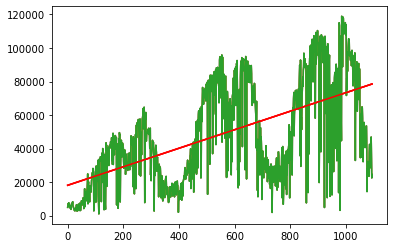

In [255]:
# XGBoost
columns = train.columns.difference(['rental', 'dayofweek', 'sunshine_rate', 'PM10', 'PM2.5'])
x = train[columns]
y = train['rental']

x_test = test[columns]
y_test = test_label['rental']

order = 1
dp = DeterministicProcess(index=x.index, constant=True, order=order, drop=True)
output = dp.in_sample()

isnull = x['precipitation'].isnull()
isnull_test = x_test['precipitation'].isnull()

for i in ['poly', 'exp', 'mean']:
    x['precipitation'].loc[isnull] = cand_pre[i]   # 결측치
    x_test['precipitation'].loc[isnull_test] = cand_pre_test[i]

    test_const = [1 for i in range(x_test.shape[0])]
    test_trend = np.arange(output['trend'].max(), output['trend'].max()+x_test.shape[0])
    
    test_trend_squared = [i**2 for i in test_trend]
    test_trend_cubed = [i**3 for i in test_trend]
    test_trend_4 = [i**4 for i in test_trend]
    test_trend_5 = [i**5 for i in test_trend]
    test_trend_6 = [i**6 for i in test_trend]
    output_test = pd.DataFrame([test_const, test_trend]).T
    output_test.columns = ['const', 'trend']
    output_test.index = x_test.index



    lm = LinearRegression()
    lm.fit(output, y)
    
    trend_train = lm.predict(output)
    trend_test = lm.predict(output_test)
    
    plt.plot(y)
    plt.plot(x.index, trend_train, 'r-')
    y_delta = y / trend_train
    
    train_y_delta = np.array(y) - trend_train
    test_y_delta = np.array(y_test) - trend_test

    xgb= XGBRegressor()
    xgb.fit(np.array(x), y_delta)

    xgb_train = xgb.predict(np.array(x))
    xgb_test = xgb.predict(x_test)
    
    print("====[", i, "]====")
    print("train NMAE: ", NMAE(np.array(y), xgb_train * trend_train))
    print("train NMAE: ", NMAE(np.array(y_test), xgb_test * trend_test))


In [258]:
submit['rental'] = xgb_test * trend_test

In [260]:
NMAE(np.array(y_test), xgb_test * trend_test)

0.20026045356239405

In [261]:
submit.to_csv("./dataset/submit_trend_mean.csv", sep=',', na_rep="NaN", index=False)

In [224]:
trend_train

array([10842.40890799, 10937.46927968, 11032.45675145, ...,
       71222.8805915 , 71238.33426439, 71253.71503736])

### GBR

C:\Users\mlpa\anaconda3\envs\mac_torch_cpu\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\mlpa\anaconda3\envs\mac_torch_cpu\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
C:\Users\mlpa\anaconda3\envs\mac_torch_cpu\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\mlpa\anaconda3\envs\mac_torch_cpu\lib\site-packag

====[ poly ]====
train NMAE:  0.1171891770060596
test NMAE:  0.2163387549342699
====[ exp ]====
train NMAE:  0.11119345801255728
test NMAE:  0.19890050651085234


C:\Users\mlpa\anaconda3\envs\mac_torch_cpu\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


====[ mean ]====
train NMAE:  0.12015542700992472
test NMAE:  0.20761408657037272


C:\Users\mlpa\anaconda3\envs\mac_torch_cpu\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


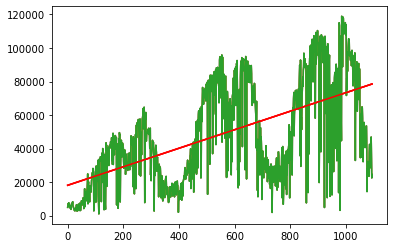

In [265]:
# GBR
columns = train.columns.difference(['rental', 'dayofweek', 'sunshine_rate', 'PM10', 'PM2.5'])
x = train[columns]
y = train['rental']

x_test = test[columns]
y_test = test_label['rental']

order = 1
dp = DeterministicProcess(index=x.index, constant=True, order=order, drop=True)
output = dp.in_sample()

isnull = x['precipitation'].isnull()
isnull_test = x_test['precipitation'].isnull()

save = []
for i in ['poly', 'exp', 'mean']:
    x['precipitation'].loc[isnull] = cand_pre[i]   # 결측치
    x_test['precipitation'].loc[isnull_test] = cand_pre_test[i]

    test_const = [1 for i in range(x_test.shape[0])]
    test_trend = np.arange(output['trend'].max(), output['trend'].max()+x_test.shape[0])
    
    test_trend_squared = [i**2 for i in test_trend]
    test_trend_cubed = [i**3 for i in test_trend]
    test_trend_4 = [i**4 for i in test_trend]
    test_trend_5 = [i**5 for i in test_trend]
    test_trend_6 = [i**6 for i in test_trend]
    output_test = pd.DataFrame([test_const, test_trend]).T
    output_test.columns = ['const', 'trend']
    output_test.index = x_test.index



    lm = LinearR egression()
    lm.fit(output, y)
    
    trend_train = lm.predict(output)
    trend_test = lm.predict(output_test)
    
    plt.plot(y)
    plt.plot(x.index, trend_train, 'r-')
    y_delta = y / trend_train
    
    train_y_delta = np.array(y) - trend_train
    test_y_delta = np.array(y_test) - trend_test

    xgb= GradientBoostingRegressor()
    xgb.fit(np.array(x), y_delta)

    xgb_train = xgb.predict(np.array(x))
    xgb_test = xgb.predict(x_test)
    
    print("====[", i, "]====")
    print("train NMAE: ", NMAE(np.array(y), xgb_train * trend_train))
    print("test NMAE: ", NMAE(np.array(y_test), xgb_test * trend_test))
    
    save.append(xgb_test * trend_test)


In [268]:
submit['rental'] = save[1]
NMAE(np.array(y_test), save[1])
submit.to_csv("./dataset/submit_trend_mean_gbr.csv", sep=',', na_rep="NaN", index=False)

### 추세 직접 계산

In [195]:
"""
추세 직접 계산
"""
train_2018 = train[train['year'] == 2018]
train_2019 = train[train['year'] == 2019]
train_2020 = train[train['year'] == 2020]
s2018 = {}
s2019 = {}
s2020 = {}

# 연도[월] = 해당연도 해당월 렌트량 합
for i in range(1, 13):
    s2018[i] = train_2018[train_2018['month'] == i]['rental'].values.sum()
    s2019[i] = train_2019[train_2019['month'] == i]['rental'].values.sum()
    s2020[i] = train_2020[train_2020['month'] == i]['rental'].values.sum()

In [196]:
# 월별 변화량
d1819 = []
d1920 = []
d1820 = []

for i in range(1, 13):
    d1819[i] = (s2019[i] - s2018[i])/s2018[i]
    d1920[i] = (s2020[i] - s2019[i])/s2019[i]
    d1820[i] = (s2020[i] - s2018[i])/s2018[i]

IndexError: list assignment index out of range

In [194]:
d1819

[]

In [197]:
train_2018

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,year,month,day,holiday,dayofweek
0,NaN,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950,2018,1,1,0,mon
1,NaN,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136,2018,1,2,0,tue
2,NaN,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156,2018,1,3,0,wed
3,NaN,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102,2018,1,4,0,thu
4,NaN,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705,2018,1,5,0,fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,NaN,-10.1,-6.5,-12.5,26.0,9.0,28.3,8.7,90.6,3.5,5.8,11325,2018,12,27,0,thu
361,NaN,-10.5,-6.6,-14.4,33.0,13.0,33.0,8.7,90.6,2.5,4.4,10445,2018,12,28,0,fri
362,NaN,-7.6,-3.0,-10.5,36.0,9.0,29.0,8.7,90.6,2.9,5.5,8083,2018,12,29,1,sat
363,NaN,-6.8,-0.9,-11.3,30.0,15.0,35.9,8.7,90.6,1.2,3.1,7864,2018,12,30,1,sun
